# 2D Rotation

# 3D Rotation

参考来源：[三维旋转：旋转矩阵，欧拉角，四元数](https://www.cnblogs.com/jins-note/p/9512728.html#:~:text=%E5%9C%A8%E6%97%8B%E8%BD%AC%E7%9F%A9%E9%98%B5%E4%B8%80%E8%8A%82%E4%B8%AD%EF%BC%8C%E6%9C%80%E5%85%88%E8%BF%9B%E8%A1%8C%E7%9A%84%E6%97%8B%E8%BD%AC%E5%85%B6%E7%9F%A9%E9%98%B5%E5%9C%A8%E6%9C%80%E5%8F%B3%E4%BE%A7%EF%BC%8C%E8%AF%B4%E6%98%8E%E8%AF%A5%E7%9F%A9%E9%98%B5%E6%9C%80%E5%85%88%E4%B8%8E%E7%82%B9%E7%9A%84%E9%BD%90%E6%AC%A1%E5%9D%90%E6%A0%87%E7%9B%B8%E4%B9%98%EF%BC%8C%E6%97%8B%E8%BD%AC%E7%9F%A9%E9%98%B5%E6%8C%89%E7%85%A7%E6%97%8B%E8%BD%AC%E7%9A%84%E6%AC%A1%E5%BA%8F%E4%BB%8E%E5%8F%B3%E5%90%91%E5%B7%A6%E6%8E%92%E5%88%97%E3%80%82,%E8%80%8C%E5%9C%A8%E6%AC%A7%E6%8B%89%E8%A7%92%E4%B8%AD%EF%BC%8C%E6%9C%80%E5%85%88%E8%BF%9B%E8%A1%8C%E7%9A%84%E6%97%8B%E8%BD%AC%E5%85%B6%E6%97%8B%E8%BD%AC%E7%9F%A9%E9%98%B5%E5%9C%A8%E6%9C%80%E5%B7%A6%E8%BE%B9%E3%80%82)。


如何描述三维空间中刚体的旋转，是个有趣的问题。具体地说，就是刚体上的任意一个点P(x, y, z)围绕过原点的轴(i, j, k)旋转θ，求旋转后的点P'(x', y', z')。

## 旋转矩阵 Rotation Matrix

旋转矩阵乘以点P的齐次坐标，得到旋转后的点P'，因此旋转矩阵可以描述旋转，

$$
\left[
    \begin{array}{cc|c}
      x' \\
      y' \\
      z' \\
      1
    \end{array}
\right] = R \cdot \left[
    \begin{array}{c}
      x \\
      y \\
      z \\
      1
    \end{array}
\right]
$$

绕x，y，或z轴旋转θ的矩阵为：

$$
R_x(\theta) = \left[
    \begin{array}{ccc}
      1 & 0 & 0 \\
      0 & cos\theta & -sin\theta \\
      0 & sin\theta & cos\theta \\
    \end{array}
\right]
$$

$$
R_y(\theta) = \left[
    \begin{array}{ccc}
      cos\theta & 0 & sin\theta \\
      0 & 1 & 0 \\
      -sin\theta & 0 & cos\theta \\
    \end{array}
\right]
$$

$$
R_z(\theta) = \left[
    \begin{array}{ccc}
      cos\theta & -sin\theta & 0 \\
      sin\theta & cos\theta & 0 \\
      0 & 0 & 1 \\
    \end{array}
\right]
$$

所以，绕任意轴旋转的矩阵为

$$
R_x(-p)\cdot R_y(-q)\cdot R_z(\theta)\cdot R_y(q)\cdot R_x(p)
$$

这表示：

1. 绕x轴旋转角度p使指定的旋转轴在xz平面上
2. 绕y轴旋转角度q使指定的旋转轴与z轴重合
3. 绕z轴旋转角度θ
4. 绕y轴旋转角度-q
5. 绕x轴旋转角度-p

其中，p和q的值需要用i,j,k计算出来。

## 问题求解

问：求从车体到前置摄像头坐标系旋转，相机的俯仰角：已知绕车体z轴旋转-90°，车体x轴旋转0°，则绕车体y轴需旋转多少度？

解题思路：根据四元数得到（复合）旋转矩阵，根据已固定量分别写出z轴和x轴旋转矩阵，再求出y轴的旋转矩阵。

In [1]:
Q_CAM_BACK_LEFT = [0.6924185592174665, -0.7031619420114925, -0.11648342771943819, 0.11203317912370753]
Q_CAM_BACK_RIGHT = [0.12280980120078765, -0.132400842670559, -0.7004305821388234, 0.690496031265798]
Q_CAM_FRONT_LEFT = [0.6757265034669446, -0.6736266522251881, 0.21214015046209478, -0.21122827103904068]
Q_CAM_BACK = [0.5037872666382278, -0.49740249788611096, -0.4941850223835201, 0.5045496097725578]
Q_CAM_FRONT_RIGHT = [0.2060347966337182, -0.2026940577919598, 0.6824507824531167, -0.6713610884174485]
Q_CAM_FRONT = [0.4998015430569128, -0.5030316162024876, 0.4997798114386805, -0.49737083824542755]
Q_LIDAR_TOP = [0.7077955119163518, -0.006492242056004365, 0.010646214713995808, -0.7063073142877817]

Qs = {
    'Q_CAM_BACK_LEFT': Q_CAM_BACK_LEFT, 
    'Q_CAM_BACK_RIGHT': Q_CAM_BACK_RIGHT,
    'Q_CAM_FRONT_LEFT': Q_CAM_FRONT_LEFT, 
    'Q_CAM_BACK': Q_CAM_BACK, 
    'Q_CAM_FRONT_RIGHT': Q_CAM_FRONT_RIGHT, 
    'Q_CAM_FRONT': Q_CAM_FRONT,
    'Q_LIDAR_TOP': Q_LIDAR_TOP,
}

from pyquaternion import Quaternion

Q_matrix = {}

for cam in Qs:
    quaternion = Quaternion(Qs[cam])#.inverse
    print(cam)
    Q_matrix[cam] = quaternion.rotation_matrix
    print(quaternion.rotation_matrix)
#     dst, jacobian = cv2.Rodrigues(quaternion.rotation_matrix)

Q_CAM_BACK_LEFT
[[ 0.94776036  0.00866572 -0.31886551]
 [ 0.31896113 -0.0139763   0.94766474]
 [ 0.00375564 -0.99986478 -0.01601021]]
Q_CAM_BACK_RIGHT
[[-0.93477554  0.01587584 -0.35488399]
 [ 0.35507456  0.0113705  -0.93476883]
 [-0.01080503 -0.99980932 -0.01626597]]
Q_CAM_FRONT_LEFT
[[ 8.20758348e-01 -3.41436671e-04  5.71275430e-01]
 [-5.71271601e-01  3.21950185e-03  8.20754770e-01]
 [-2.11945808e-03 -9.99994759e-01  2.44737995e-03]]
Q_CAM_BACK
[[ 0.00242171 -0.01675361 -0.99985672]
 [ 0.99998907 -0.00395911  0.00248837]
 [-0.00400023 -0.99985181  0.01674384]]
Q_CAM_FRONT_RIGHT
[[-8.32929563e-01 -9.94603768e-06  5.53379023e-01]
 [-5.53304927e-01  1.63788158e-02 -8.32817742e-01]
 [-9.05540984e-03 -9.99865858e-01 -1.36479031e-02]]
Q_CAM_FRONT
[[ 5.68477868e-03 -5.63666773e-03  9.99967955e-01]
 [-9.99983517e-01 -8.37115272e-04  5.68014846e-03]
 [ 8.05071338e-04 -9.99983763e-01 -5.64133364e-03]]
Q_LIDAR_TOP
[[ 0.00203327  0.99970406  0.02424172]
 [-0.99998053  0.00217566 -0.00584864]
 [-

In [2]:
import numpy as np

def get_rx_matrix(theta: float):
    """根据弧度获得x轴旋转矩阵
    theta: 弧度
    return: np.array 3x3
    """
    return np.array([
        [1,0,0],
        [0,np.cos(theta), -np.sin(theta)],
        [0,np.sin(theta), np.cos(theta)],
    ])

def get_ry_matrix(theta: float):
    """根据弧度获得y轴旋转矩阵
    theta: 弧度
    return: np.array 3x3
    """
    return np.array([
        [np.cos(theta),0,np.sin(theta)],
        [0,1, 0],
        [-np.sin(theta), 0, np.cos(theta)],
    ])

def get_rz_matrix(theta: float):
    """根据弧度获得z轴旋转矩阵
    theta: 弧度
    return: np.array 3x3
    """
    return np.array([
        [np.cos(theta), -np.sin(theta),0],
        [np.sin(theta), np.cos(theta),0],
        [0,0,1],
    ])



### 先拿简单的只需旋转90°的Q_LIDAR_TOP试验一下求某个轴的旋转矩阵（或旋转角度）

In [3]:
Q_LIDAR_TOP_Rx = get_rx_matrix(0)
Q_LIDAR_TOP_Ry = get_ry_matrix(0)
Q_LIDAR_TOP_Rz = get_rz_matrix(-90/180*np.pi) # 这里按照车体坐标系朝相机坐标系演变为前进方向
Q_LIDAR_TOP_Rx, Q_LIDAR_TOP_Ry, Q_LIDAR_TOP_Rz

(array([[ 1.,  0.,  0.],
        [ 0.,  1., -0.],
        [ 0.,  0.,  1.]]),
 array([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [-0.,  0.,  1.]]),
 array([[ 6.123234e-17,  1.000000e+00,  0.000000e+00],
        [-1.000000e+00,  6.123234e-17,  0.000000e+00],
        [ 0.000000e+00,  0.000000e+00,  1.000000e+00]]))

In [4]:
# 看看自己的旋转矩阵
Q_LIDAR_TOP_Rx.dot(Q_LIDAR_TOP_Ry).dot(Q_LIDAR_TOP_Rz)

array([[ 6.123234e-17,  1.000000e+00,  0.000000e+00],
       [-1.000000e+00,  6.123234e-17,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  1.000000e+00]])

In [5]:
# 看看四元数转换来的旋转矩阵
Q_matrix['Q_LIDAR_TOP']

array([[ 0.00203327,  0.99970406,  0.02424172],
       [-0.99998053,  0.00217566, -0.00584864],
       [-0.00589965, -0.02422936,  0.99968902]])

In [6]:
# 四元数转换来的旋转矩阵 求逆
np.linalg.inv(Q_matrix['Q_LIDAR_TOP'])

array([[ 0.00203327, -0.99998053, -0.00589965],
       [ 0.99970406,  0.00217566, -0.02422936],
       [ 0.02424172, -0.00584864,  0.99968902]])

In [9]:
# 根据”矩阵除法“求Q_LIDAR_TOP_Rz：通过Rx和Ry左乘旋转矩阵的逆矩阵得到
# A/B，则等于A * (B的逆矩阵)
Q_matrix['Q_LIDAR_TOP'].dot(np.linalg.inv(Q_LIDAR_TOP_Rx.dot(Q_LIDAR_TOP_Ry)))

array([[ 0.00203327,  0.99970406,  0.02424172],
       [-0.99998053,  0.00217566, -0.00584864],
       [-0.00589965, -0.02422936,  0.99968902]])

In [18]:
# 猜测的Rz
Q_LIDAR_TOP_Rz

array([[ 6.123234e-17,  1.000000e+00,  0.000000e+00],
       [-1.000000e+00,  6.123234e-17,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  1.000000e+00]])

#### 结论：可以发现，求出的z轴旋转矩阵Rz和预想的一致

### 求正前方相机的俯仰角

In [30]:
Q_CAM_FRONT_Rx = get_rx_matrix(0)
Q_CAM_FRONT_Ry = get_ry_matrix(90/180*np.pi) # 猜想值，待验证的值
Q_CAM_FRONT_Rz = get_rz_matrix(-90/180*np.pi)
Q_CAM_FRONT_Rx, Q_CAM_FRONT_Ry, Q_CAM_FRONT_Rz

(array([[ 1.,  0.,  0.],
        [ 0.,  1., -0.],
        [ 0.,  0.,  1.]]),
 array([[ 6.123234e-17,  0.000000e+00,  1.000000e+00],
        [ 0.000000e+00,  1.000000e+00,  0.000000e+00],
        [-1.000000e+00,  0.000000e+00,  6.123234e-17]]),
 array([[ 6.123234e-17,  1.000000e+00,  0.000000e+00],
        [-1.000000e+00,  6.123234e-17,  0.000000e+00],
        [ 0.000000e+00,  0.000000e+00,  1.000000e+00]]))

In [31]:
# 看看自己的旋转矩阵
Q_CAM_FRONT_Rx.dot(Q_CAM_FRONT_Ry).dot(Q_CAM_FRONT_Rz)

array([[ 3.74939946e-33,  6.12323400e-17,  1.00000000e+00],
       [-1.00000000e+00,  6.12323400e-17,  0.00000000e+00],
       [-6.12323400e-17, -1.00000000e+00,  6.12323400e-17]])

In [32]:
# 看看四元数转换来的旋转矩阵
Q_matrix['Q_CAM_FRONT']

array([[ 5.68477868e-03, -5.63666773e-03,  9.99967955e-01],
       [-9.99983517e-01, -8.37115272e-04,  5.68014846e-03],
       [ 8.05071338e-04, -9.99983763e-01, -5.64133364e-03]])

In [33]:
# 根据”矩阵除法“求Q_LIDAR_TOP_Ry：通过Rx和Rz左乘旋转矩阵的逆矩阵得到
# A/B，则等于A * (B的逆矩阵)
Q_CAM_FRONT_Ry_infered = Q_matrix['Q_CAM_FRONT'].dot(np.linalg.inv(Q_CAM_FRONT_Rx.dot(Q_CAM_FRONT_Rz)))
Q_CAM_FRONT_Ry_infered

array([[-5.63666773e-03, -5.68477868e-03,  9.99967955e-01],
       [-8.37115272e-04,  9.99983517e-01,  5.68014846e-03],
       [-9.99983763e-01, -8.05071338e-04, -5.64133364e-03]])

In [34]:
# 猜测的Ry
Q_CAM_FRONT_Ry

array([[ 6.123234e-17,  0.000000e+00,  1.000000e+00],
       [ 0.000000e+00,  1.000000e+00,  0.000000e+00],
       [-1.000000e+00,  0.000000e+00,  6.123234e-17]])

In [64]:
# 求绕y轴旋转角度
np.arcsin(Q_CAM_FRONT_Ry_infered[0][2]) / np.pi * 180
# 90度说明相机刚好立起来，没有略微俯视

89.54131122701229

#### 结论：正前方相机摆放平行于水平面，而非轻微俯视

### 求左前方相机z轴旋转角度

In [43]:
Q_CAM_FRONT_LEFT_Rx = get_rx_matrix(-90/180*np.pi)
Q_CAM_FRONT_LEFT_Ry = get_ry_matrix(0) # 自我假设值
# Q_CAM_FRONT_LEFT_Rz = get_rz_matrix(-90/180*np.pi)
Q_CAM_FRONT_LEFT_Rx, Q_CAM_FRONT_LEFT_Ry#, Q_CAM_FRONT_Rz

(array([[ 1.000000e+00,  0.000000e+00,  0.000000e+00],
        [ 0.000000e+00,  6.123234e-17,  1.000000e+00],
        [ 0.000000e+00, -1.000000e+00,  6.123234e-17]]),
 array([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [-0.,  0.,  1.]]))

In [46]:
Q_CAM_FRONT_LEFT_Rz_infered = Q_matrix['Q_CAM_FRONT_LEFT'].dot(np.linalg.inv(Q_CAM_FRONT_LEFT_Rx.dot(Q_CAM_FRONT_LEFT_Ry)))
Q_CAM_FRONT_LEFT_Rz_infered

array([[ 8.20758348e-01,  5.71275430e-01,  3.41436671e-04],
       [-5.71271601e-01,  8.20754770e-01, -3.21950185e-03],
       [-2.11945808e-03,  2.44737995e-03,  9.99994759e-01]])

In [51]:
# 求旋转角度
-np.arcsin(Q_CAM_FRONT_LEFT_Rz_infered[0][1]) / np.pi * 180

-34.83921336321834

In [49]:
np.arccos(Q_CAM_FRONT_LEFT_Rz_infered[0][0]) / np.pi * 180

34.83922048603969

#### 结论：左前方相机绕z轴旋转-34°，与预期一致

### 旋转矩阵符合交换律吗

In [56]:
Q_CAM_FRONT_Rx, Q_CAM_FRONT_Ry

(array([[ 1.,  0.,  0.],
        [ 0.,  1., -0.],
        [ 0.,  0.,  1.]]),
 array([[ 6.123234e-17,  0.000000e+00,  1.000000e+00],
        [ 0.000000e+00,  1.000000e+00,  0.000000e+00],
        [-1.000000e+00,  0.000000e+00,  6.123234e-17]]))

In [52]:
Q_CAM_FRONT_Rx.dot(Q_CAM_FRONT_Ry)

array([[ 6.123234e-17,  0.000000e+00,  1.000000e+00],
       [ 0.000000e+00,  1.000000e+00,  0.000000e+00],
       [-1.000000e+00,  0.000000e+00,  6.123234e-17]])

In [53]:
Q_CAM_FRONT_Ry.dot(Q_CAM_FRONT_Rx)

array([[ 6.123234e-17,  0.000000e+00,  1.000000e+00],
       [ 0.000000e+00,  1.000000e+00,  0.000000e+00],
       [-1.000000e+00,  0.000000e+00,  6.123234e-17]])

In [54]:
Q_CAM_FRONT_Rx + Q_CAM_FRONT_Ry - Q_CAM_FRONT_Ry.dot(Q_CAM_FRONT_Rx)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### 结论：因为Q_CAM_FRONT_Rx是单位矩阵，所以符合交换律

In [59]:
Q_CAM_FRONT_Ry = get_ry_matrix(90/180*np.pi) # 自我假设值
Q_CAM_FRONT_Rz = get_rz_matrix(-90/180*np.pi)
Q_CAM_FRONT_Ry, Q_CAM_FRONT_Rz

(array([[ 6.123234e-17,  0.000000e+00,  1.000000e+00],
        [ 0.000000e+00,  1.000000e+00,  0.000000e+00],
        [-1.000000e+00,  0.000000e+00,  6.123234e-17]]),
 array([[ 6.123234e-17,  1.000000e+00,  0.000000e+00],
        [-1.000000e+00,  6.123234e-17,  0.000000e+00],
        [ 0.000000e+00,  0.000000e+00,  1.000000e+00]]))

In [62]:
Q_CAM_FRONT_Ry.dot(Q_CAM_FRONT_Rz) - Q_CAM_FRONT_Rz.dot(Q_CAM_FRONT_Ry)
# 可通过矩阵初等变换为全0矩阵

array([[ 0., -1.,  1.],
       [-1.,  0.,  1.],
       [ 1., -1.,  0.]])

#### 结论：因为 Q_CAM_FRONT_Ry 和 Q_CAM_FRONT_Rz 的矩阵乘积可通过初等变换变为全0，所以符合交换律

#### 结论：从几何角度考虑，因为旋转矩阵始终是按固定坐标系（车体坐标系）的轴来进行旋转，所以先绕哪个轴旋转都一样，所以各轴旋转矩阵符合交换律

## 欧拉角 Euler angle

欧拉角也可以描述三维刚体旋转，它将刚体绕过原点的轴(i,j,k)旋转θ，分解成三步（蓝色是起始坐标系，而红色的是旋转之后的坐标系。）。

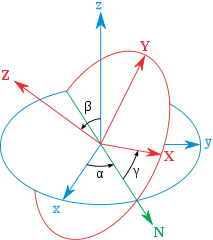

1. 绕z轴旋转α，使x轴与N轴重合，N轴是旋转前后两个坐标系x-y平面的交线
2. 绕x轴（也就是N轴）旋转β，使z轴与旋转后的z轴重合
3. 绕z轴旋转γ，使坐标系与旋转后的完全重合

按照旋转轴的顺序，该组欧拉角被称为是“zxz顺规”的。对于顺规的次序，学术界没有明确的约定。

欧拉角的旋转矩阵为：

$$
R_z(\alpha)\cdot R_x(\beta)\cdot R_y(\gamma)
$$

在旋转矩阵一节中，最先进行的旋转其矩阵在最右侧，说明该矩阵最先与点的齐次坐标相乘，旋转矩阵按照旋转的次序从右向左排列。而在欧拉角中，最先进行的旋转其旋转矩阵在最左边。这是因为，**对于前者（旋转矩阵），我们始终是以绝对参考系为参照来的，对于后者（欧拉角），我们每一次旋转的刻画都是基于刚体的坐标系。**比如，在欧拉角中的第2步，绕x轴旋转β，这里的x轴实际上是N轴了（而不是蓝色的x轴）。

## 四元数 Quaternion

四元数是今天的主角，它能够很方便的刻画刚体绕任意轴的旋转。四元数是一种高阶复数，四元数q表示为：

$$
q = (x,y,z,w) = xi + yj + zk + w
$$

其中，i，j，k满足：

$$
i^2 = j^2 = k^2 = -1
$$
$$
ij = k, jk=i, ki=j
$$

由于i，j，k的性质和笛卡尔坐标系三个轴叉乘的性质很像，所以可以将四元数写成一个向量和一个实数组合的形式：

$$
q = (\vec{v}+w) = ((x,y,z),w)
$$

可以推导出四元数的一些运算性质，包括：

* 四元数乘法

$$
q_1q_2 = (\vec{v_1} \times \vec{v_2} + w_1\vec{v_2} + w_2\vec{v_1}, w_1w_2-\vec{v_1} \cdot \vec{v_2} )
$$

* 共轭四元数

* 四元数的平方模

* 四元数的逆

四元数可以看做是向量和实数的一种更加一般的形式，向量可以视作为实部为0的四元数，而实数可以是作为虚部为0的四元数。上述四元数的运算性质也是实数或向量的运算性质的更一般的形式。

四元数可用来刻画三维空间中的旋转，绕单位向量(x,y,z)表示的轴旋转θ，可令：

$$
q = ((x,y,z)sin(\frac {\theta}{2}), cos(\frac {\theta}{2}))
$$

刚体坐标系中的点p(P,0)（写成四元数的形式），旋转后的坐标p'为：

$$
p' = qpq^{-1}
$$

## 验证项目

- 在nuScenes数据集中，通过输入各个轴的旋转分量，来获得旋转矩阵，然后和从四元数转换得到的旋转矩阵进行对比